In [1]:
import tensorflow

In [13]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense,Flatten

In [3]:
(X_train, y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
X_train.shape

(60000, 28, 28)

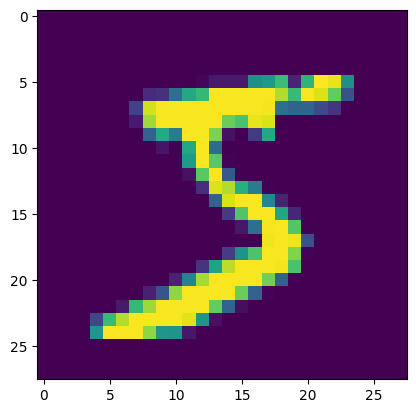

In [5]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

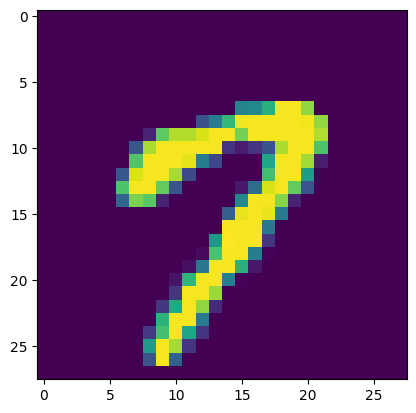

In [7]:
import matplotlib.pyplot as plt
plt.imshow(X_train[15])

In [ ]:
# Neural network mein ye pixels bhi train karne se pehle ek scale mein laa denge kyu ki fir weights sahi jaldi niklenge and convergence jaldi hoga.
# Very important to have values in a range

In [8]:
X_train = X_train/250
X_test = X_test/250

In [9]:
X_train[0] # achieved everything in one range now

array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   

In [38]:
model = Sequential()

model.add(Input(shape=(28,28)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [39]:
model.summary() # here we can see there are 101770 weights and biases

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,938 (409.91 KB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
# sparse_categorical_crossentropy mein one-hot encoding karne ki need nahi hai
# categorical_crossentropy mein one-hot encoding karne ki zarurat hai

model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [41]:
history = model.fit(X_train,y_train, epochs = 25, validation_split = 0.2)

Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8539 - loss: 0.5021 - val_accuracy: 0.9551 - val_loss: 0.1540
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9607 - loss: 0.1293 - val_accuracy: 0.9654 - val_loss: 0.1161
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9733 - loss: 0.0872 - val_accuracy: 0.9712 - val_loss: 0.0966
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9811 - loss: 0.0619 - val_accuracy: 0.9698 - val_loss: 0.1001
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9862 - loss: 0.0475 - val_accuracy: 0.9677 - val_loss: 0.1073
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9881 - loss: 0.0356 - val_accuracy: 0.9700 - val_loss: 0.1039
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9885 - loss: 0.0350 - val_accuracy: 0.9743 - val_loss: 0.0957
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9909 - loss: 0.026

In [28]:
X_test.shape

(10000, 28, 28)

In [42]:
model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[8.5086472e-22, 1.6486133e-16, 3.2375967e-15, ..., 9.9999994e-01,
        6.6675998e-20, 4.1139445e-16],
       [3.2369745e-18, 3.7570339e-14, 9.9999994e-01, ..., 7.5116814e-17,
        3.5934471e-11, 3.0195000e-22],
       [7.3754007e-13, 9.9999171e-01, 4.6857290e-06, ..., 1.3068487e-09,
        3.5723851e-06, 6.0925535e-11],
       ...,
       [4.1046760e-33, 1.6080467e-17, 1.0177743e-26, ..., 5.4080110e-15,
        1.1599892e-15, 2.0434834e-13],
       [2.1596124e-28, 2.2743409e-36, 2.2199754e-31, ..., 2.0296752e-27,
        1.8963976e-10, 3.3810632e-28],
       [4.1708604e-17, 2.1077278e-20, 1.3156162e-19, ..., 2.3778939e-29,
        1.6758912e-24, 1.3483807e-30]], dtype=float32)

In [43]:
y_prob = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [44]:
y_prob.argmax(axis=1)

array([7, 2, 1, ..., 4, 5, 6])

In [45]:
y_pred = y_prob.argmax(axis=1)

In [46]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9778

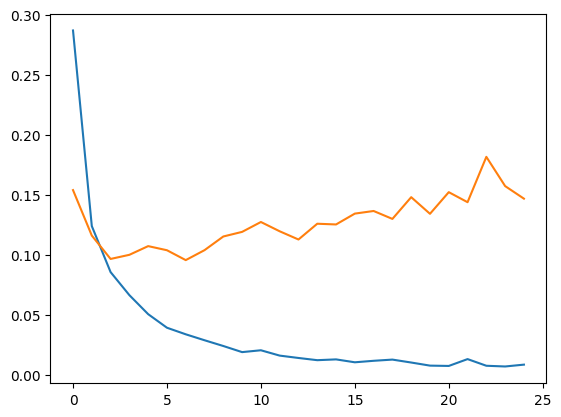

In [47]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

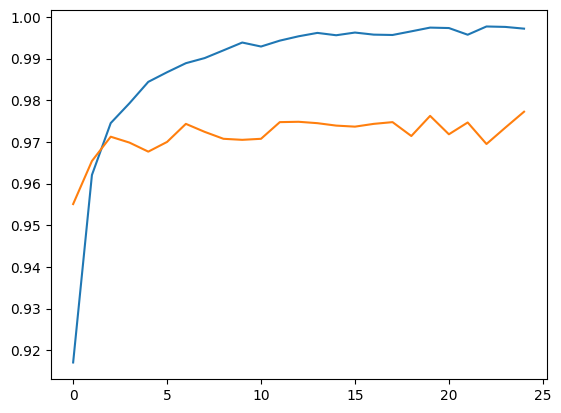

In [48]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

# this is an example of overfitting. This can be solved with the help of regularization, drop-outs, and much more.

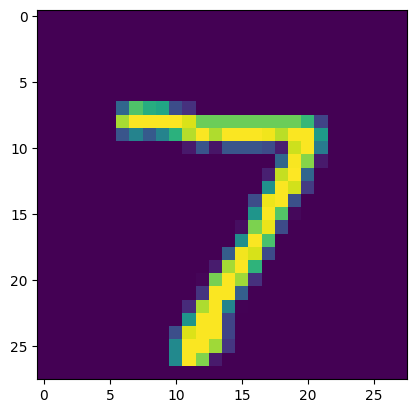

In [50]:
plt.imshow(X_test[0])

In [60]:
model.predict(X_test[0].reshape(1,28,28)).argmax(axis = 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


array([7])

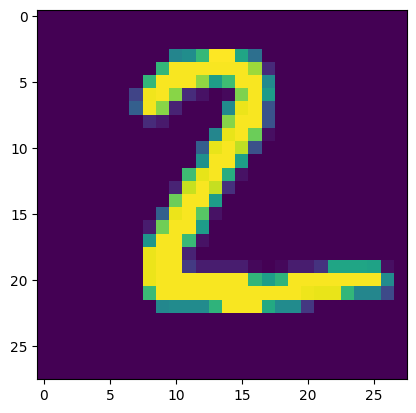

In [62]:
plt.imshow(X_test[1])

In [61]:
model.predict(X_test[1].reshape(1,28,28)).argmax(axis = 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


array([2])